# Mi primer codigo en Spark

In [10]:
# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F
import missingno as msno


### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# esquema de dataframe
esquema = StructType().add("id","string").add("pais","string").add("nombre","string").add("edad","integer")

# datos de dataframe. la diagonal SIN ESPACIO Y ENTER PARA CONTINUAR INSERTANDO DATOS
datos = [("a001","Francia","Claire", 30), ("a002","Alemania","Franz",38),\
         ("a003","Italia","Florence", 31), ("a004","EUA","Marc",28) ]

# creacion de dataframe
df = spark.createDataFrame( datos, schema=esquema)

# ver las columnas solo es
df.columns

# columnas y tipo de datos
df.dtypes

# columnas y tipo de datos mas elegante
df.printSchema()

# imprimir dataframe TODO
#df.show()

# imprime solo el primer registro (numero de renglones a ver) empezando desde el primer renglon
df.show(2)


root
 |-- id: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- nombre: string (nullable = true)
 |-- edad: integer (nullable = true)

+----+--------+------+----+
|  id|    pais|nombre|edad|
+----+--------+------+----+
|a001| Francia|Claire|  30|
|a002|Alemania| Franz|  38|
+----+--------+------+----+
only showing top 2 rows



## Spark y archivos (CVS -Separado por comas)


In [9]:

# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F


### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# transferir archivo desde carpeta archivo separado por comas csv
archivo="datasets/iris.csv.txt"
# InferSchema infiere y decide que tipo de dato seran, se puede quitar de sep="," ya que se separa por comas
# cuando el archivo no tiene encabezado se pone como falso pero lo acomoda de manera que se pueda 
df = spark.read.csv( archivo, header=True, sep=",", inferSchema=True)

# ver columnas
#df.columns

# ver columnas y tipo de dato
#df.dtypes
#df.printSchema()

# ver los datos
df.show()


+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

## Spark y archivos (TVS separado por tabulador)

In [13]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F


### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# transferir archivo desde carpeta archivo separado por comas csv
archivo="datasets/iris.tsv.txt"
# InferSchema infiere y decide que tipo de dato seran, se puede quitar de sep="," ya que se separa por comas
# cuando el archivo no tiene encabezado se pone como falso pero lo acomoda de manera que se pueda 
df = spark.read.csv( archivo, header=True, sep="\t", inferSchema=True)

# ver columnas
#df.columns

# ver columnas y tipo de dato
#df.dtypes
#df.printSchema()

# ver los datos
#df.show()

# trae los datos del servidor mas cercano, se optimiza 
df.limit(50).show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

## Funcion SELECT (reemplazar datos nulos y mostrarlos en graficas)

PassengerId  ->  0
Pclass  ->  0
Name  ->  0
Sex  ->  0
Age  ->  86
SibSp  ->  0
Parch  ->  0
Ticket  ->  0
Fare  ->  1
Cabin  ->  327
Embarked  ->  0


[('PassengerId', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

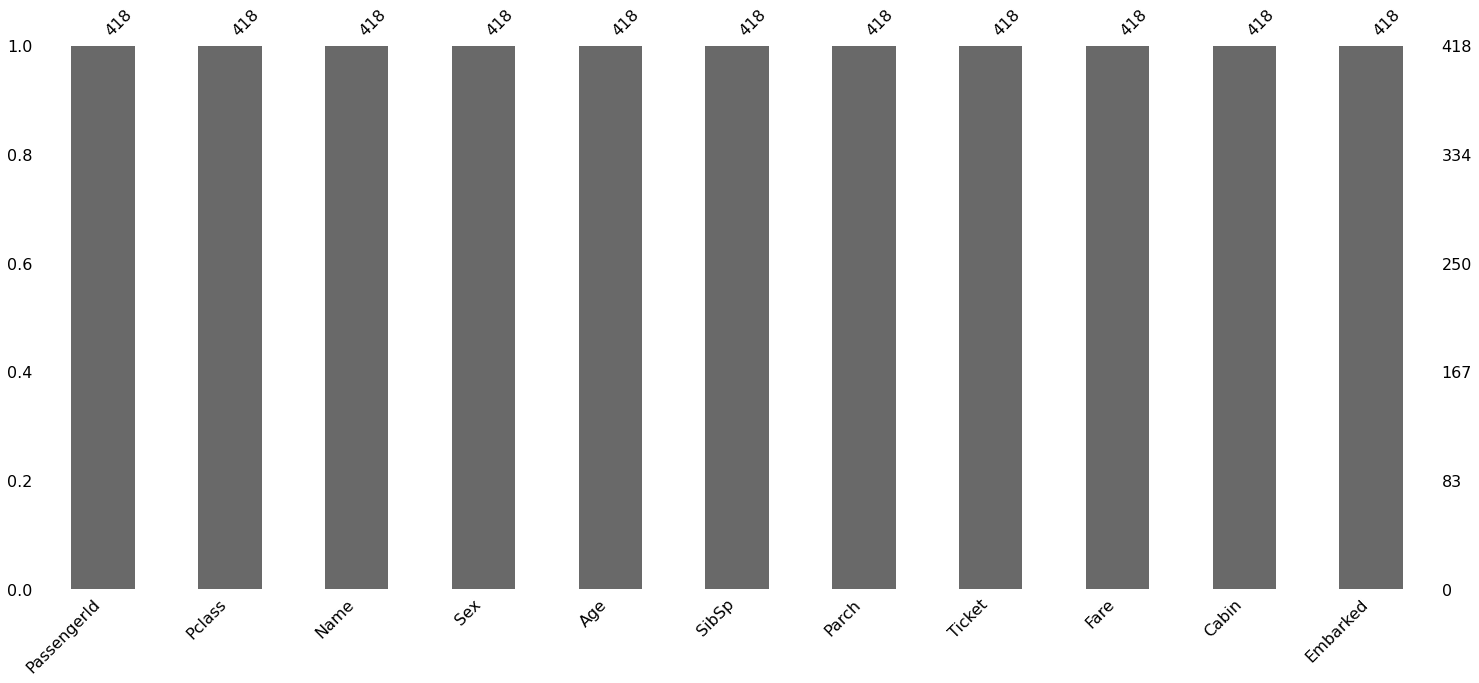

In [19]:
# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F
import missingno as msno

### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# transferir archivo desde carpeta archivo separado por comas csv
archivo="datasets/titanic_dataset.csv"

df = spark.read.csv( archivo, header=True, sep="\t", inferSchema=True)


# una o mas columnas en especifico en el orden indicado 
# df.select("species","sepal_length").show()

df.dtypes


# verificar datos no asigandos
# se recorre cada una de las columnas en donde imprime el nombre de la columna
for columna in df.columns:
    # filtre cada elementos que son nulos y al final se cuentan 
     print (columna, " -> ", df.filter( df [columna].isNull() ).count())

# recibe un dataframe tipo panda. Franjas blancas hay valores son las rayas
# m = msno.matrix(df.toPandas() )
# m.get_figure().show()

# muestra grafica de barras de los valores nulos
# m = msno.bar(df.toPandas() )
# m.get_figure().show()

#llenar los valores no asignados -rellenar datos nulos (imputacion de datos
re_na = {"Age":0, "Fare":0, "Cabin":"desconocida"}
df = df.fillna(re_na)

#borrar los valores no asignados
# df = df.na.drop()

# borraa todos los registros nulos
#df = df.na.drop(subset=["Age","Fare","Cabin"])

m = msno.bar(df.toPandas() )
m.get_figure().show()

df.dtypes

In [36]:
# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F
import missingno as msno

### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# transferir archivo desde carpeta archivo separado por comas csv
archivo="datasets/auto_mpg_data_tvs.txt"

df = spark.read.csv( archivo, header=True, sep="\t", inferSchema=True)


# una o mas columnas en especifico en el orden indicado 
# df.select("species","sepal_length").show()

print(df.dtypes)

# cuenta cuantos  valores se puede  conviertir a valor numerico
for columna in df.columns:
    print (columna, "--> ",df.filter(~F.col(columna).cast("float").isNotNull()).count())


# df.filter(~F.col("horsepower").cast("float").isNotNull()).show(400)

#hacer reemplazo ? caracter, por el cual se reemplaza y columna
df = df.replace("?","0","horsepower")
#df.show(400)

#cambia de tipo de dato de una columna, estaba String y se convirtio a float 
df = df.withColumn("horsepower", F.col("horsepower").cast("float"))
print(df.dtypes)

[('mpg', 'double'), ('cylinders', 'int'), ('displacement', 'double'), ('horsepower', 'string'), ('weight', 'decimal(4,0)'), ('acceleration', 'double'), ('model_year', 'int'), ('origin', 'int'), ('car_name', 'string')]
mpg -->  0
cylinders -->  0
displacement -->  0
horsepower -->  6
weight -->  0
acceleration -->  0
model_year -->  0
origin -->  0
car_name -->  398
[('mpg', 'double'), ('cylinders', 'int'), ('displacement', 'double'), ('horsepower', 'float'), ('weight', 'decimal(4,0)'), ('acceleration', 'double'), ('model_year', 'int'), ('origin', 'int'), ('car_name', 'string')]


## uso del select 

In [20]:
# Manejo de datatypes
from pyspark.sql.types import * 

#Hace la conexion entre el codigo y el spark server
from pyspark.sql import SparkSession

#metodos de Spark y los asigna a la variable F
import pyspark.sql.functions as F
import missingno as msno

### Main
spark = SparkSession.builder.appName("primer_codigo").getOrCreate()

# transferir archivo desde carpeta archivo separado por comas csv
archivo="datasets/auto_mpg_data_tvs.txt"

df = spark.read.csv( archivo, header=True, sep="\t", inferSchema=True)
#df.show()

# select - para manipular las columnas de un dataframe. Recibe como parametro en el orden que se quiere ver 
#df.select("car_name","mpg").show() 

# a veces se puede usar de esta manera
#columnas = ["car_name","mpg","horsepower"]
#df.select(*columnas).show()

# car_name tiene que llmar se nombre_de_auto se usa un alias -Solo se renombra una columna a la vez
#df.select(F.col("car_name").alias("nombre_de_auto")).show() 

# si se desea renombrar mas de una - NUNCA DEJAR ESPACIO EN BLANCO EN EL ALIAS PARA SU USO
#df.select(F.col("car_name").alias("nombre_de_auto"), F.col("mpg").alias("millas_por_galon")).show() 

# variante del alias: F.expr    solo funciona para un alias
#df.select(F.expr("car_name as nombre_de_auto")).show()

# variante del alias: F.expr    para dos o mas alias
#df.select(F.expr("car_name as nombre_de_auto"), F.expr("mpg as millas_por_galon")).show()

# distinct() SON VALORES DISTINTOS elimina valores repetidos
# select distinct nombre_de_columnas
#df.select(F.expr("cylinders as cilindros")).distinct().show()

# otros usos de F.expr -> se pueden hacer operaciones aritmeticas dentro 
#df.select(F.expr("cylinders +1")).distinct().show()
#df.select(F.expr("cylinders *2")).distinct().show()


# OPERACIONES ARITMETICAS ENTRE COLUMNAS
#df.select(F.expr("cylinders *mpg")).distinct().show()
#df.select(F.expr("cylinders *mpg as gasto_de_combustible")).distinct().show()

# orderBy -> se ordenan de maera ascendente
df.select("cylinders").orderBy("cylinders", ascending = True).show()

# muestra el nombre del carro y los cilindros en donde solo ardena por ciliindros de manera ascendente
df.select("car_name","cylinders").orderBy("cylinders", ascending = True).show()

#pedir columnas
#si tiene valores nulos y por metodo grafico
#si tiene datos validos para esas columnas


+---------+
|cylinders|
+---------+
|        3|
|        3|
|        3|
|        3|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
|        4|
+---------+
only showing top 20 rows

+--------------------+---------+
|            car_name|cylinders|
+--------------------+---------+
|          mazda rx-4|        3|
|       mazda rx-7 gs|        3|
|     mazda rx2 coupe|        3|
|           maxda rx3|        3|
|       toyota carina|        4|
|volkswagen model 111|        4|
|         datsun 1200|        4|
|          ford pinto|        4|
|    plymouth cricket|        4|
|toyota corona har...|        4|
| toyota corolla 1200|        4|
|   volkswagen type 3|        4|
|      chevrolet vega|        4|
| ford pinto runabout|        4|
|volkswagen 1131 d...|        4|
|            bmw 2002|        4|
|  dodge colt hardtop|        4|
| chevrolet vega 2300|    